<a href="https://colab.research.google.com/github/len-rtz/NLP-LLM-Toolkits/blob/main/DeppL-ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning and Machine Learning Frameworks

# Scikit-learn

- supervised and unsupervised learning algorithms
- tools for model selection, evaluation and preprocessing
- interoperability with other Python libraries, such as NumPy and SciPy
- functionalities for classification, regression, clustering, dimensionality reduction
- free and open-source

## Resources
- https://scikit-learn.org/stable/
- https://scikit-learn.org/stable/user_guide.html
- https://scikit-learn.org/stable/auto_examples/index.html

## ABC's of Scikit-learn



In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_breast_cancer, load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, classification_report, silhouette_score

              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



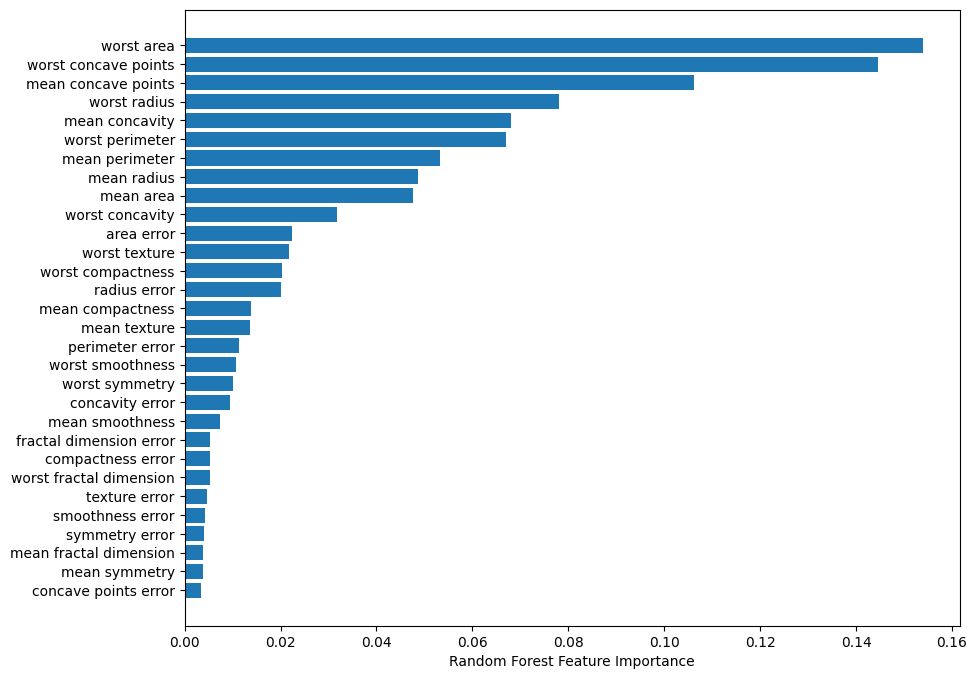

In [16]:
# 1. Binary Classification (Breast Cancer Dataset)
# malignant or benign cancer
cancer = load_breast_cancer()
X_cancer, y_cancer = cancer.data, cancer.target
# Split data into train and test
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42
)

# Scale features using StandardScaler to normalize them
scaler_cancer = StandardScaler()
X_train_scaled_cancer = scaler_cancer.fit_transform(X_train_cancer)
X_test_scaled_cancer = scaler_cancer.transform(X_test_cancer)

# Train RandomForestClassifier and evaluate performance
clf_cancer = RandomForestClassifier(n_estimators=100, random_state=42)
clf_cancer.fit(X_train_scaled_cancer, y_train_cancer)
y_pred_cancer = clf_cancer.predict(X_test_scaled_cancer)
print(classification_report(y_test_cancer, y_pred_cancer, target_names=cancer.target_names))

# Feature Importance Visualization
feature_importance = clf_cancer.feature_importances_
feature_names = cancer.feature_names
sorted_idx = feature_importance.argsort()
plt.figure(figsize=(10, 8))
plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

Mean Squared Error: 0.5559


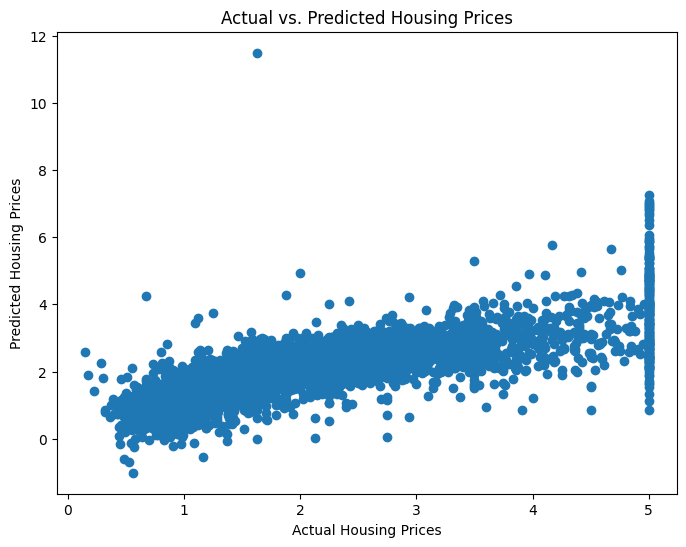

In [18]:
# 2. Regression (California Housing Dataset)
# Prediction of House Prices
housing = fetch_california_housing()
X_housing, y_housing = housing.data, housing.target

# Split data into train and test
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(
    X_housing, y_housing, test_size=0.2, random_state=42
)

# Scale data for Normalization
scaler_housing = StandardScaler()
X_train_scaled_housing = scaler_housing.fit_transform(X_train_housing)
X_test_scaled_housing = scaler_housing.transform(X_test_housing)

# train ridge regression model (L2) and evaluation using MSE
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled_housing, y_train_housing)
y_pred_housing = ridge.predict(X_test_scaled_housing)
print(f"Mean Squared Error: {mean_squared_error(y_test_housing, y_pred_housing):.4f}")

# Prediction vs Actual Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test_housing, y_pred_housing)
plt.xlabel("Actual Housing Prices")
plt.ylabel("Predicted Housing Prices")
plt.title("Actual vs. Predicted Housing Prices")
plt.show()

Silhouette Score: 0.4799


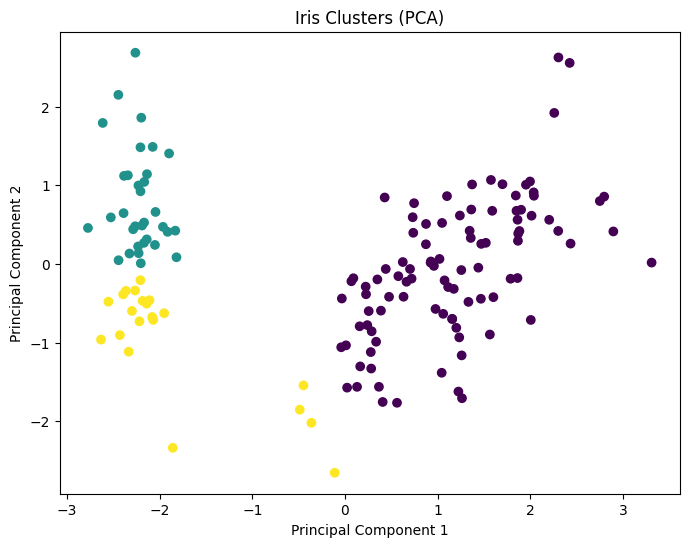

In [19]:
# 3. Clustering (Iris Dataset)
iris = load_iris()
X_iris_cluster = iris.data

# Scale dataset for Normalization
scaler_iris_cluster = StandardScaler()
X_iris_scaled_cluster = scaler_iris_cluster.fit_transform(X_iris_cluster)

# K-means clustering with three clusters and evaluation with shilouette score
kmeans_iris = KMeans(n_clusters=3, random_state=42)
labels_iris = kmeans_iris.fit_predict(X_iris_scaled_cluster)
print(f"Silhouette Score: {silhouette_score(X_iris_scaled_cluster, labels_iris):.4f}")

# Cluster Visualization (using PCA for dimensionality reduction to 2)
pca_iris = PCA(n_components=2)
X_iris_pca = pca_iris.fit_transform(X_iris_scaled_cluster)
plt.figure(figsize=(8, 6))
plt.scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], c=labels_iris, cmap="viridis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Iris Clusters (PCA)")
plt.show()

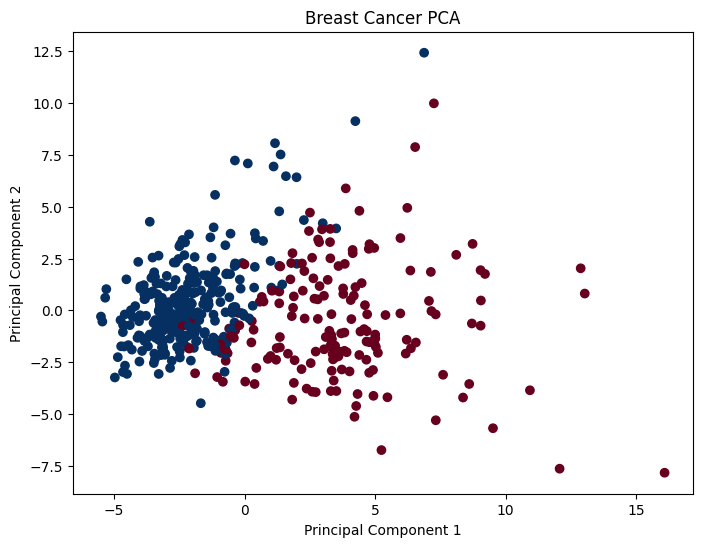

Explained Variance Ratio: [0.43502782 0.19500007]


In [21]:
# 4. Dimensionality Reduction (PCA on Cancer Dataset)
pca_cancer = PCA(n_components=2)
X_cancer_pca = pca_cancer.fit_transform(X_train_scaled_cancer)

# PCA Visualization of classes in scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_cancer_pca[:, 0], X_cancer_pca[:, 1], c=y_train_cancer, cmap="RdBu")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Breast Cancer PCA")
plt.show()

# Explained Variance Ratio aka how much of the original variance is retained in the reduced dimensions
print("Explained Variance Ratio:", pca_cancer.explained_variance_ratio_)

## Problems with these easy examples:
- all models are used with default parameters, in real-world scenarios parameter tuning is essential to optimise performance
- a more robust evaluation would involve cross-validation to assess models generalization performance better
- code uses minimal data exploration, in praxis it's crucial to understand your data before using ML models
- no feature engineering, in real-world scenarios it can be useful to create new features or transform existing ones to improve model performance

# TensorFlow

- ML platform developed by Google
- ecosystem of tools, libraries and resources for building and deploying ML models
- for numerical computation and large-scale ML
- supports deep learning and traditional ML
- provides high-level APIs like Keras for model development and low-level APIs for fine-grained control
- tools for data preprocessing, model training and evaluation
- free and open-source

## Main Use Cases
- Deep Learning
  - image recognition and classification
  - NLP
  - speech recognition and ynthesis
  - generative models (GANs, VAEs)
- Machine Leaning
  - regression and classification tasks
  - time series analysis
  - reinforcement learning
- Data preprocessing, transformation and pipelines

## Resources
- https://www.tensorflow.org/tutorials
- https://www.dataquest.io/blog/tutorial-introduction-to-tensorflow/

## ABC's of TensorFlow

In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, classification_report, silhouette_score
import tensorflow_probability as tfp
tfd = tfp.distributions


--- Improved Linear Regression (Keras) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Mean Squared Error: 2.0449


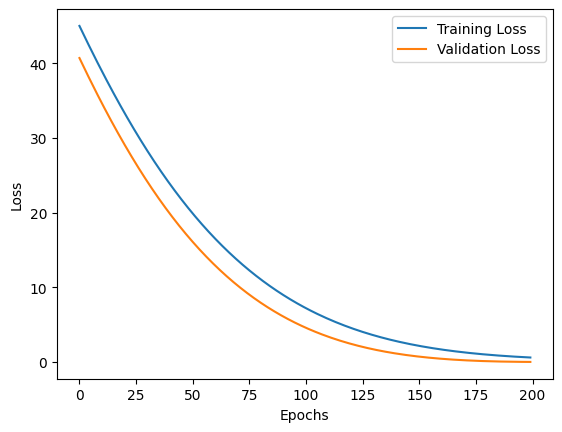

In [30]:
# 1. Linear Regression (TensorFlow Keras)
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]], dtype=np.float32)
y = np.dot(X, np.array([1, 2], dtype=np.float32)) + 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_regression = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,))
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) # Improved optimizer
model_regression.compile(optimizer=optimizer, loss='mse')
history = model_regression.fit(X_train, y_train, epochs=200, verbose=0, validation_split=0.2) # Added validation

y_pred = model_regression.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Plotting training/validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.9915


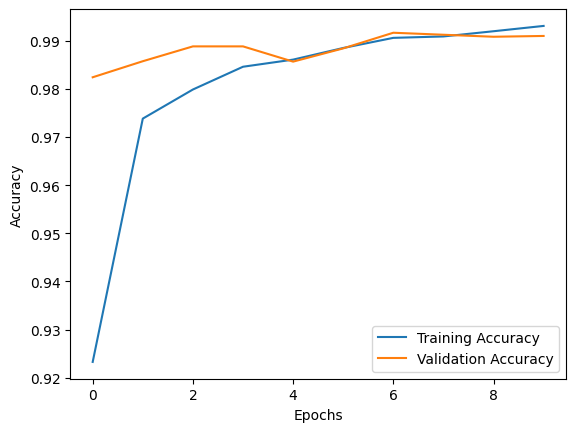

In [31]:
# 2. Image Classification (MNIST)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape((60000, 28, 28, 1)) # Add channel dimension
x_test = x_test.reshape((10000, 28, 28, 1))

model_classification = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # Convolutional layer
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_classification.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_classification = model_classification.fit(x_train, y_train, epochs=10, verbose=0, validation_split=0.2)

print(f"Test Accuracy: {model_classification.evaluate(x_test, y_test, verbose=0)[1]:.4f}")

#plot the training and validation accuracy.
plt.plot(history_classification.history['accuracy'], label='Training Accuracy')
plt.plot(history_classification.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

AttributeError: module 'tensorflow_probability.python.experimental.nn' has no attribute 'KMeans'